In [42]:
import math
import numpy as np
import statistics
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [27]:
def read_nums(fname: str) -> []:
    data_array = []
    try:
        with open(fname, 'r') as file:
            # 逐行读取文件内容
            for line in file:
                # 去除换行符并使用逗号分割
                line_data = line.strip().split(',')
                # 将分割后的数据添加到数组
                for n in line_data:
                    data_array.append(float(n))
    except FileNotFoundError:
        print(f"File not found: {file}")
        return None
    return data_array

def printArray(array):
    for i in range(len(array)):
        print(array[i])

In [28]:
def generate_super_exponential(size, lambda1, lambda2, p):
    u = np.random.rand(size)
    return np.where(u < p,
                    np.random.exponential(1/lambda1, size),
                    np.random.exponential(1/lambda2, size))


def generate_sequence(sequence):
    target_mean = np.mean(sequence)

    size = len(sequence)
    lambda1 = 1 / (target_mean * 0.2)  # 较小的均值
    lambda2 = 1 / (target_mean * 1.8)  # 较大的均值
    p = 0.5  # 权重，设定每个指数分布选取的概率

    while True:
        generatedSequence = generate_super_exponential(size, lambda1, lambda2, p)
        correlation, _ = pearsonr(np.sort(sequence), np.sort(generatedSequence))

        if (abs(np.var(generatedSequence) - np.var(sequence)) < 10) and (abs(np.mean(generatedSequence) - np.mean(sequence)) < 1):
            break  # 满足条件，退出循环

    # print("----")
    # print(np.mean(sequence))
    # print(np.var(sequence))
    # print(np.mean(generatedSequence))
    # print(np.var(generatedSequence))
    # 
    # print(correlation)
    # print("----")
    # printArray(generatedSequence)
    
    return generatedSequence

In [37]:
def math_expectation(nums:[])->float:
  return statistics.mean(nums)


def math_variance(nums:[]) -> float:
  aver = math_expectation(nums)
  result = 0
  for i in nums:
    result = (aver - i)**2 + result
  result = result/(len(nums)-1)
  return result


def math_standard_deviation(nums:[]) -> float:
  return math.sqrt(math_variance(nums))


def math_coeff_var(nums:[]) -> float:
  return math_standard_deviation(nums)/math_expectation(nums)


def math_margin_of_error(nums: [], level: float)->float:
  z_critical = stats.norm.ppf((1 + level) / 2)
  # 计算置信区间
  margin_of_error = z_critical * (math_standard_deviation(nums) / math.sqrt(len(nums)))
  return margin_of_error


def cal_characteristics(nums:[], size: int):
  real_math_exception = math_expectation(nums)
  real_deviation = math_standard_deviation(nums)
  real_coeff_var = math_coeff_var(nums)
  real_variance = math_variance(nums)
  real_level_95 = math_margin_of_error(nums, 0.95)
  real_level_99 = math_margin_of_error(nums, 0.99)
  real_level_90 = math_margin_of_error(nums, 0.90)
  
  nums = nums[0:size]
  exp_math_exception = math_expectation(nums)
  exp_deviation = math_standard_deviation(nums)
  exp_coeff_var = math_coeff_var(nums)
  exp_variance = math_variance(nums)
  exp_level_95 = math_margin_of_error(nums, 0.95)
  exp_level_99 = math_margin_of_error(nums, 0.99)
  exp_level_90 = math_margin_of_error(nums, 0.90)
  
  print("Count of elements:" + str(size))
  print("математическое ожидание: %.2f" % exp_math_exception)
  print("percentage: %.2f"%((exp_math_exception-real_math_exception)*100/real_math_exception))
  print("дисперсия: %.2f"%exp_variance)
  print("percentage: %.2f"%((exp_variance-real_variance)*100/real_variance))
  print("среднеквадратическое отклонение: %.2f"% exp_deviation)
  print("percentage: %.2f"%((exp_deviation-real_deviation)*100/real_deviation))
  print("коэффициент вариации: %.2f" % (exp_coeff_var))
  print("percentage: %.2f" %((exp_coeff_var-real_coeff_var)*100/real_coeff_var))
  print("доверительные интервалы для оценки математического ожидания с доверительными вероятностями 0,9; 0,95 и 0,99:")
  print("%.2f"%exp_level_90)
  print("percentage: %.2f" %((exp_level_90-real_level_90)*100/real_level_90))
  print("%.2f"%exp_level_95)
  print("percentage: %.2f" %((exp_level_95-real_level_95)*100/real_level_95))
  print("%.2f"%exp_level_99)
  print("percentage: %.2f" %((exp_level_99-real_level_99)*100/real_level_99))
  print("")

In [39]:
originalSequence = read_nums("./original_sequence.csv")

cal_characteristics(originalSequence,10)
cal_characteristics(originalSequence,20)
cal_characteristics(originalSequence,50)
cal_characteristics(originalSequence,100)
cal_characteristics(originalSequence,200)
cal_characteristics(originalSequence,300)

Count of elements:10
математическое ожидание: 23.50
percentage: 3.50
дисперсия: 1624.18
percentage: 6.96
среднеквадратическое отклонение: 40.30
percentage: 3.42
коэффициент вариации: 1.71
percentage: -0.08
доверительные интервалы для оценки математического ожидания с доверительными вероятностями 0,9; 0,95 и 0,99:
20.96
percentage: 466.45
24.98
percentage: 466.45
32.83
percentage: 466.45

Count of elements:20
математическое ожидание: 17.04
percentage: -24.96
дисперсия: 951.82
percentage: -37.32
среднеквадратическое отклонение: 30.85
percentage: -20.83
коэффициент вариации: 1.81
percentage: 5.51
доверительные интервалы для оценки математического ожидания с доверительными вероятностями 0,9; 0,95 и 0,99:
11.35
percentage: 206.63
13.52
percentage: 206.63
17.77
percentage: 206.63

Count of elements:50
математическое ожидание: 22.25
percentage: -2.02
дисперсия: 1094.83
percentage: -27.90
среднеквадратическое отклонение: 33.09
percentage: -15.09
коэффициент вариации: 1.49
percentage: -13.34
до

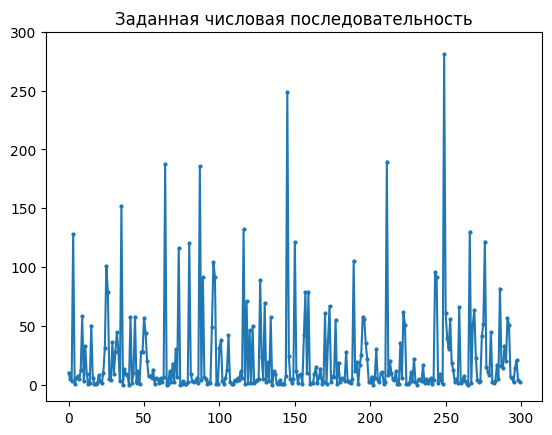

In [58]:
plt.figure() # 创建第一个图的窗口
np_nums = np.array(originalSequence)
x = np.arange(0,300)
plt.plot(x,np_nums, marker='o',markersize=2)

plt.yticks(np.arange(0,350,50))
plt.title("Заданная числовая последовательность")
# 保存图形到文件
plt.savefig('1.png')

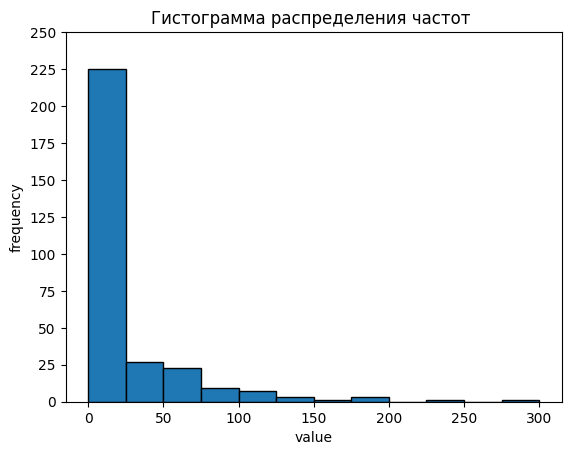

In [65]:
plt.figure()
# 绘制频率直方图
plt.hist(originalSequence, bins=np.arange(0,325,25), edgecolor='black') 
# 添加标题和标签
plt.title('Гистограмма распределения частот ')
plt.xlabel('value')
plt.ylabel('frequency')
plt.yticks(np.arange(0,275,25))
# 显示图形
plt.savefig('2.png')

In [ ]:
generatedSequence = generate_sequence(originalSequence)